# **Image Feature Extraction and Clustering Using ResNet50 and K-Means**  

### **Description:**  
This notebook demonstrates a pipeline for extracting image features using a pre-trained **ResNet50** model and clustering the images with the **K-Means** algorithm. It is specifically designed for analyzing datasets, such as CPAP patient image data, by grouping visually similar images into clusters.  

### **Key Steps Covered:**  
1. **Feature Extraction with ResNet50:**  
   - Leverages transfer learning to extract high-level features from images.  
2. **Batch Processing of Image Data:**  
   - Loads and preprocesses multiple images from a specified directory.  
3. **K-Means Clustering:**  
   - Groups the extracted image features into clusters based on visual similarities.  
4. **Cluster Visualization:**  
   - Displays sample images from each cluster to assess grouping quality.  

This workflow is useful for tasks involving **unsupervised learning**, **image organization**, and **pattern discovery** in large datasets.

Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.cluster import KMeans
from PIL import Image

Mount Google Drive for file access

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive




# **Feature Extraction Using ResNet50 for Image Data in CPAP Patient Analysis**

In [ ]:
# Set the path to your image directory
folder_path = '/content/drive/My Drive/rutgers/CPAPPatients/'

# Initialize the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
##consider changing to 224 target size, it will prob perform better, so compare
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

94765736/94765736 [==============================] - 2s 0us/step


# **Batch Feature Extraction from Image Dataset Using ResNet50**

In [ ]:

# Extract features from all images
image_data = []
image_paths = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(folder_path, filename)
        features = extract_features(img_path)
        image_data.append(features)
        image_paths.append(img_path)

# Convert to numpy array
image_data = np.array(image_data)

1/1 [==============================] - 0s 325ms/step


# **Image Clustering and Visualization Using K-Means Algorithm**

In [ ]:
# Perform clustering
n_clusters = 20  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(image_data)

# Create a DataFrame with results
df = pd.DataFrame({
    'photo_name': [os.path.basename(path) for path in image_paths],
    'cluster': cluster_labels
})

print(len(df))
print(df)

# Optional: Visualize some images from each cluster
def show_images_from_cluster(cluster_num, num_images=10):
    cluster_images = df[df['cluster'] == cluster_num]['photo_name'].values[:num_images]
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, img_name in enumerate(cluster_images):
        img = Image.open(os.path.join(folder_path, img_name))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Cluster {cluster_num}')
    plt.show()

# Uncomment the following lines to visualize images from each cluster
# import matplotlib.pyplot as plt
# for i in range(n_clusters):
#     show_images_from_cluster(i)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


200
         photo_name  cluster
0    figure1057.jpg       13
1    figure1064.jpg       18
2    figure1089.jpg       19
3    figure1055.jpg       11
4    figure1112.jpg       13
..              ...      ...
195  figure1011.jpg       12
196  figure1068.jpg        3
197  figure1017.jpg        3
198  figure1046.jpg        8
199  figure1136.jpg       10

[200 rows x 2 columns]


# **Cluster Image Visualization with Adjustable Grid Layout**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import math

def show_images_from_cluster(df, folder_path, cluster_num, num_images=10):
    cluster_images = df[df['cluster'] == cluster_num]['photo_name'].values[:num_images]
    num_images = len(cluster_images)
    num_cols = min(5, num_images)
    num_rows = math.ceil(num_images / num_cols)

    fig = plt.figure(figsize=(4 * num_cols, 4 * (num_rows + 0.5)))
    fig.suptitle(f'Images from Cluster {cluster_num}', fontsize=16, y=0.98)

    for i, img_name in enumerate(cluster_images):
        img = Image.open(os.path.join(folder_path, img_name))
        ax = fig.add_subplot(num_rows, num_cols, i + 1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Image {i+1}')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top margin to make room for the title
    plt.show()

# Usage example:
# show_images_from_cluster(df, folder_path, cluster_num=5, num_images=5)

**visualize one cluster**

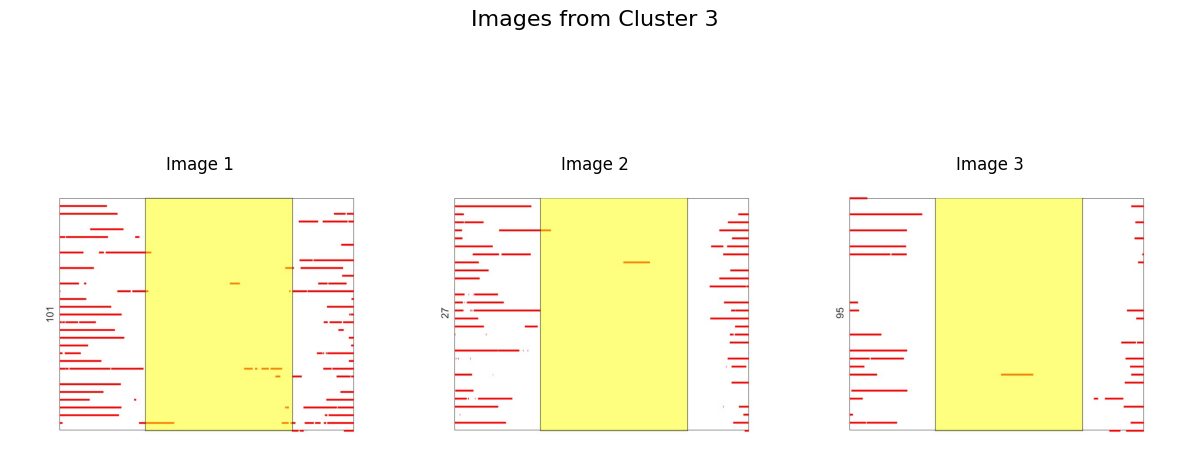

In [ ]:
show_images_from_cluster(df, folder_path, cluster_num=3, num_images=3)

# **Simple Cluster Image Visualization for Selected Groups**

In [ ]:
# Optional: Visualize some images from each cluster
def show_images_from_cluster_2(cluster_num, num_images=10):
    cluster_images = df[df['cluster'] == cluster_num]['photo_name'].values[:num_images]
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, img_name in enumerate(cluster_images):
        img = Image.open(os.path.join(folder_path, img_name))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Cluster {cluster_num}')
    plt.show()

# **Display Images from All Clusters Using Matplotlib, 20 clusters**

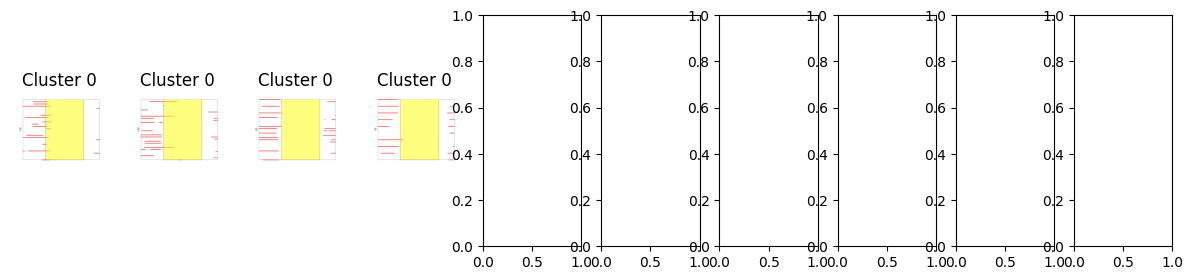

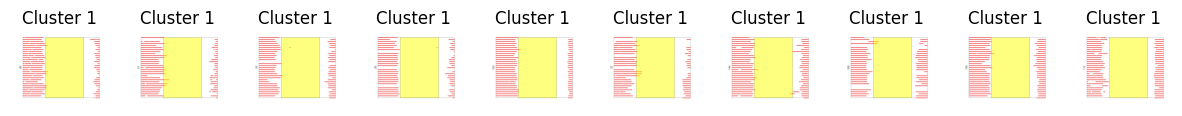

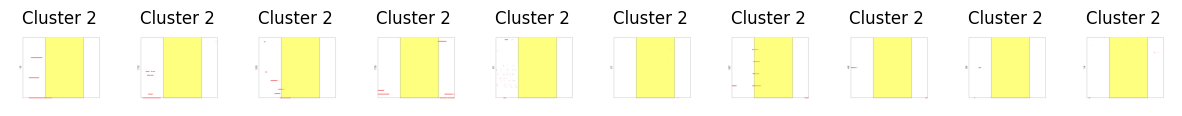

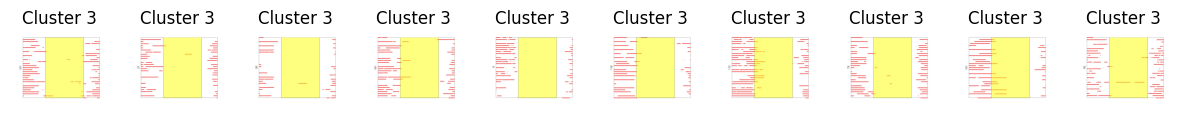

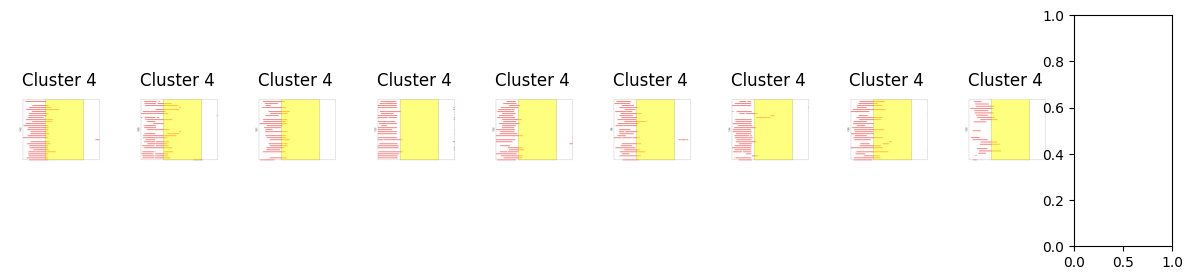

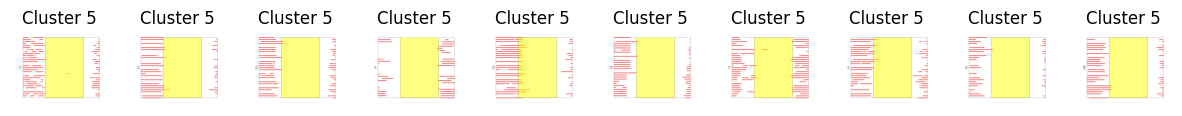

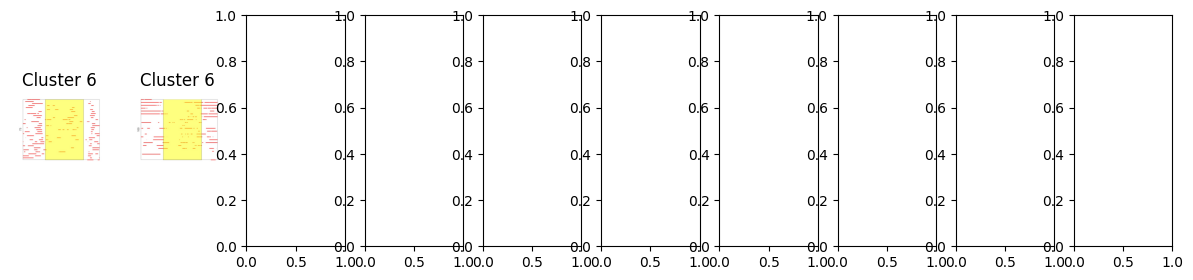

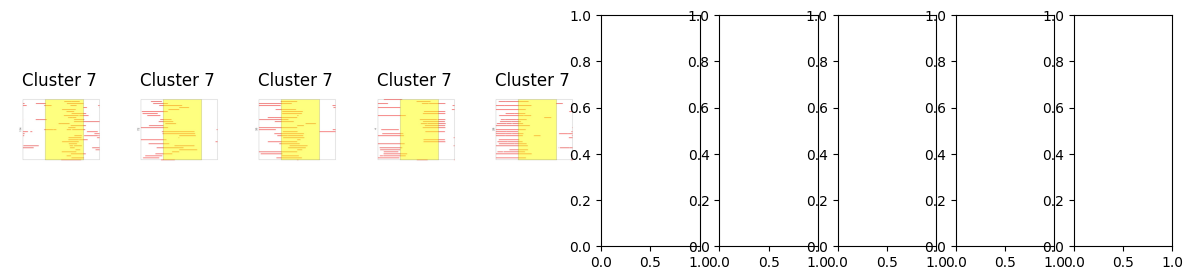

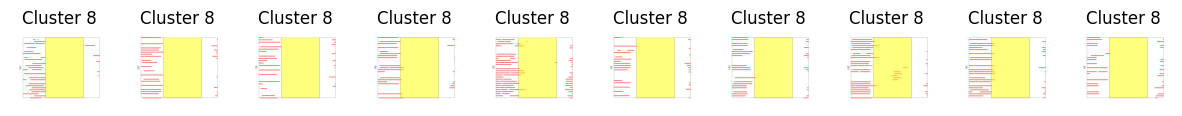

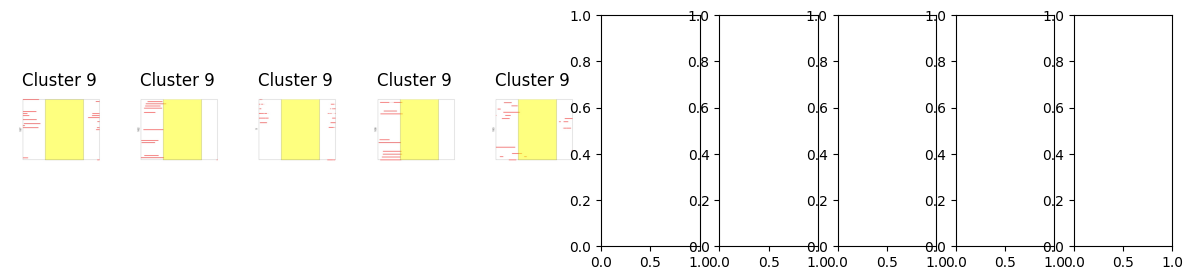

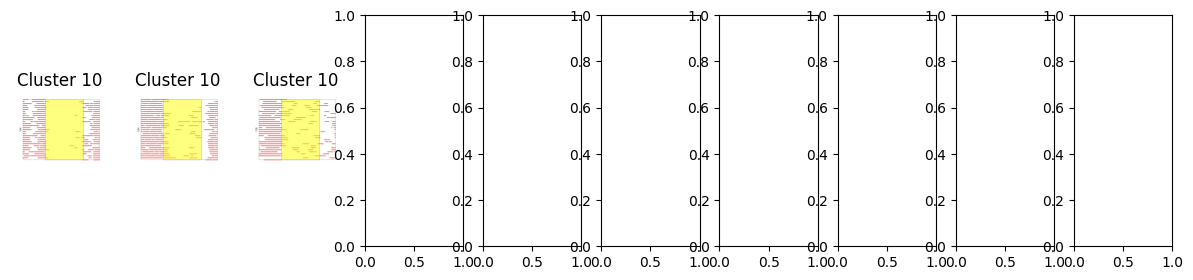

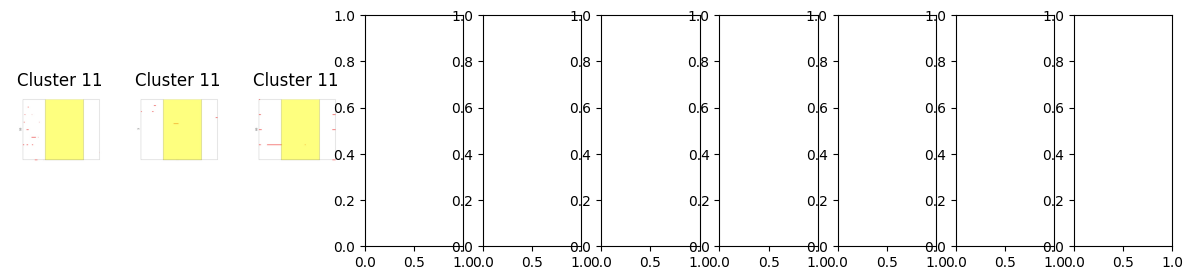

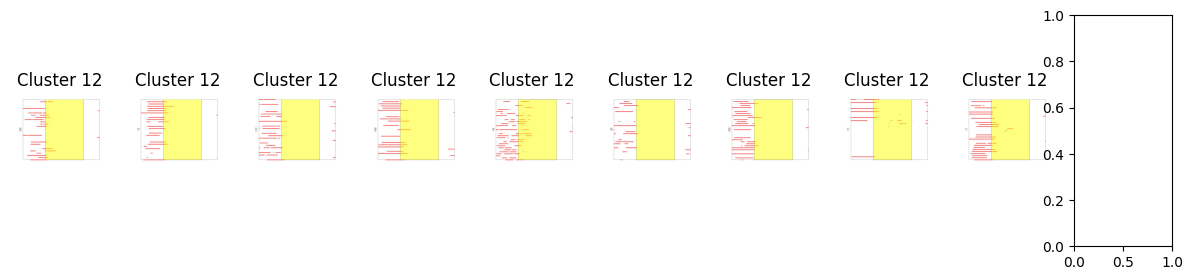

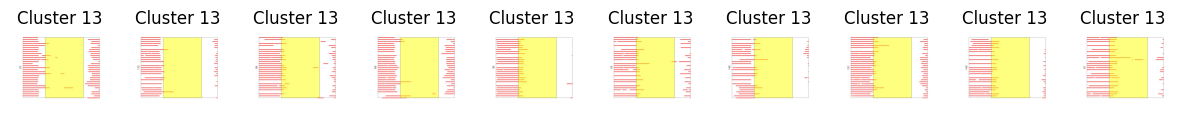

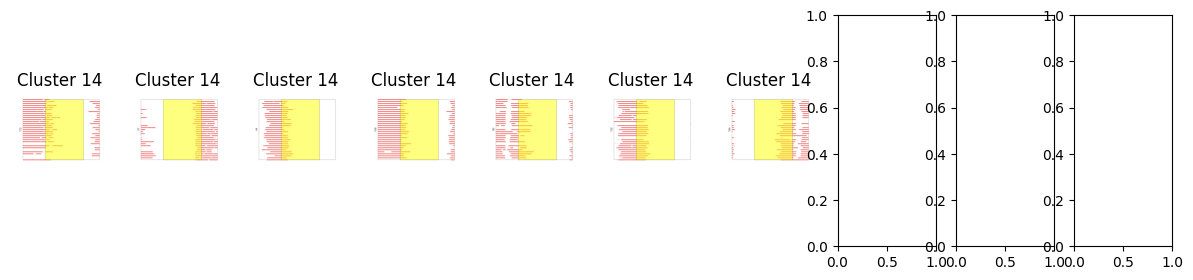

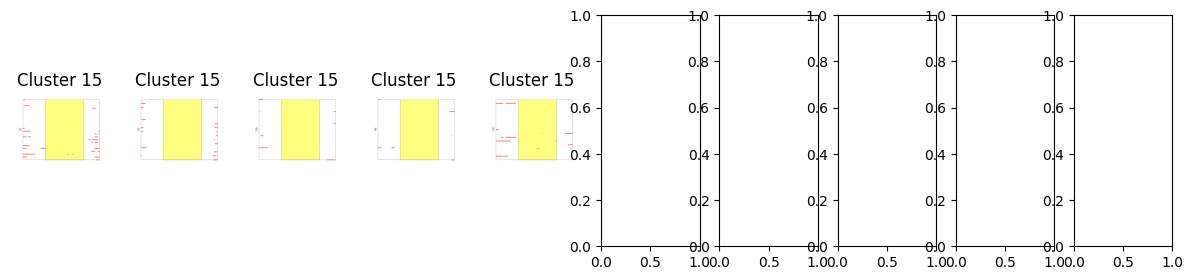

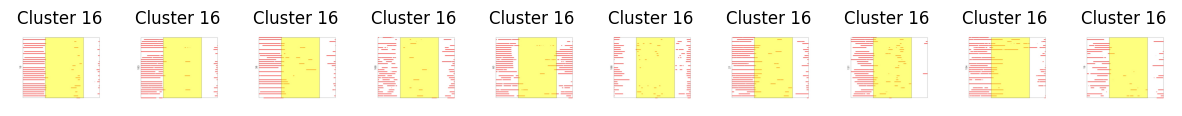

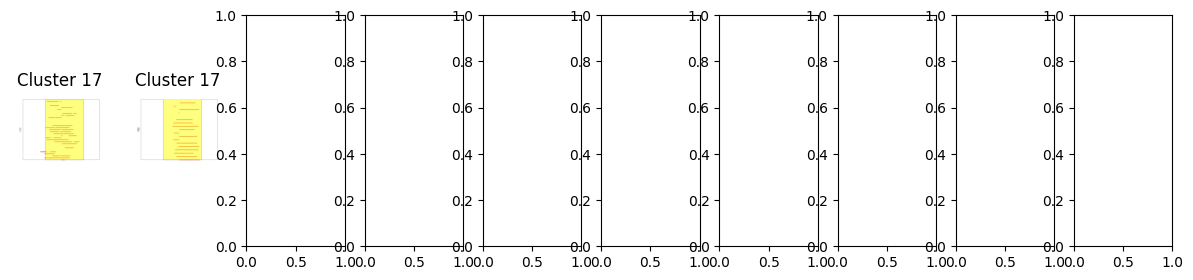

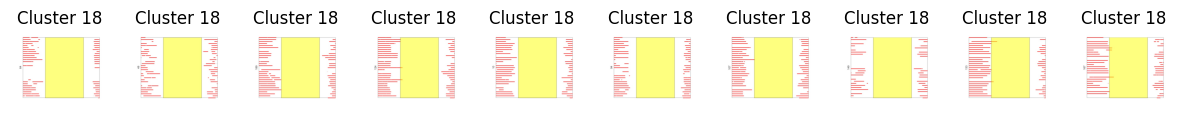

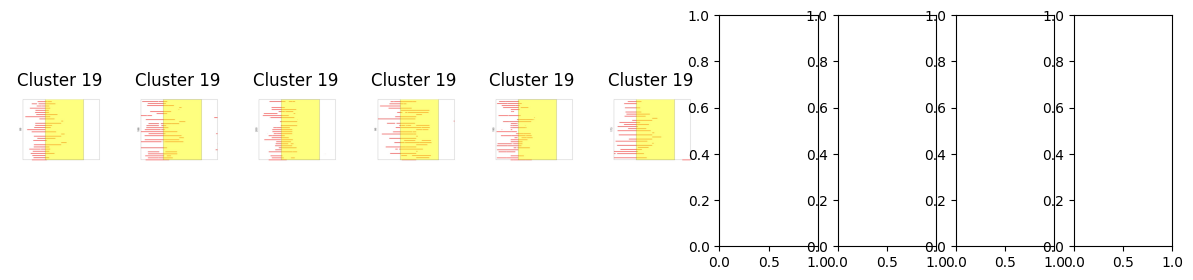

In [ ]:
import matplotlib.pyplot as plt
for i in range(n_clusters):
    show_images_from_cluster_2(i)

# **Display Images from All Clusters Using Matplotlib, 5 clusters**

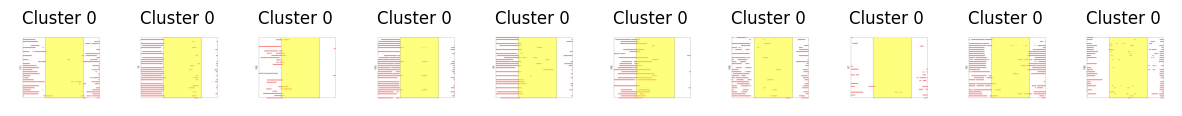

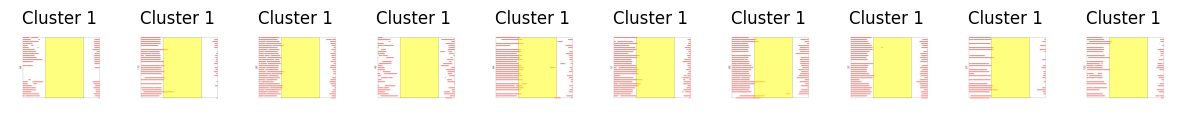

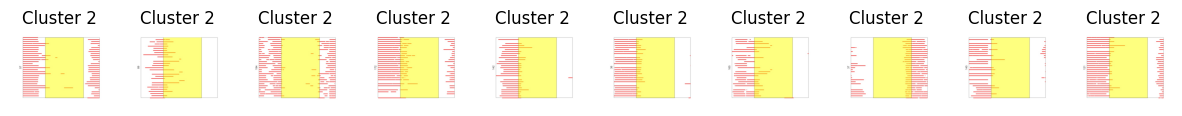

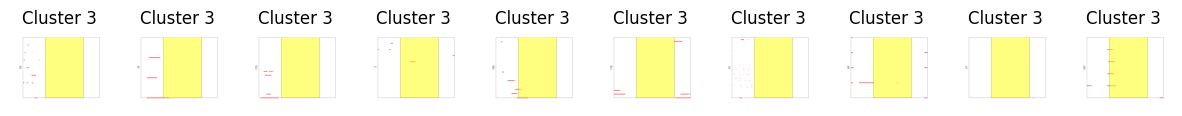

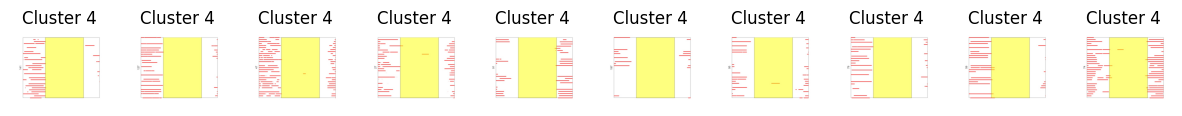

In [ ]:
import matplotlib.pyplot as plt
for i in range(n_clusters):
    show_images_from_cluster(i)

# **Display Images from All Clusters Using Matplotlib, 10 clusters**

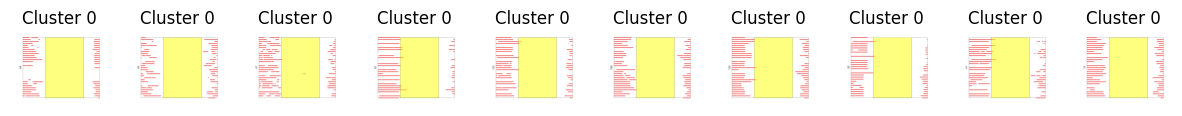

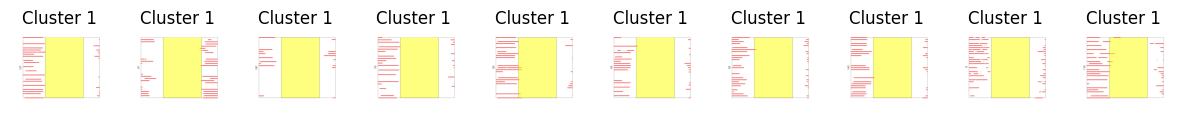

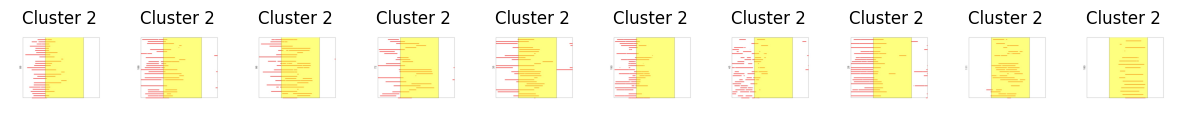

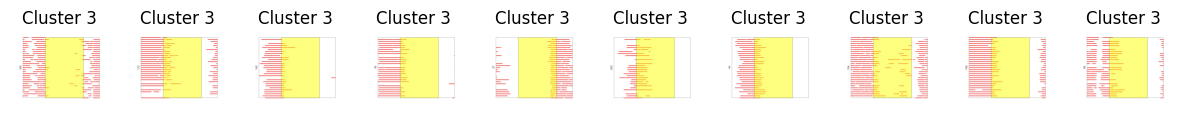

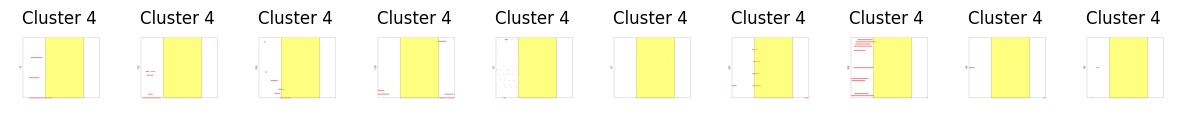

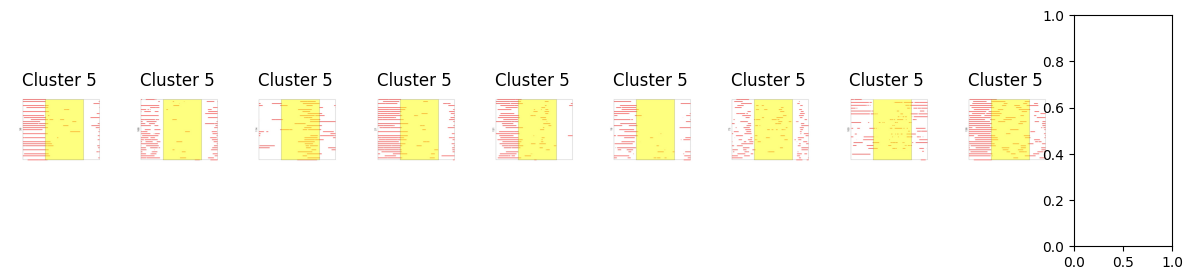

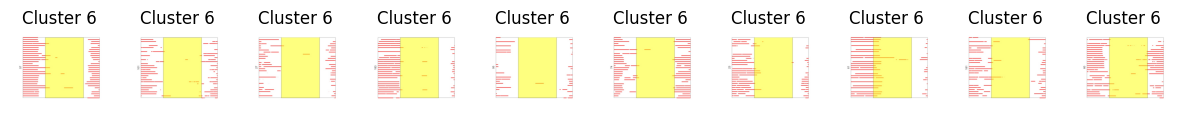

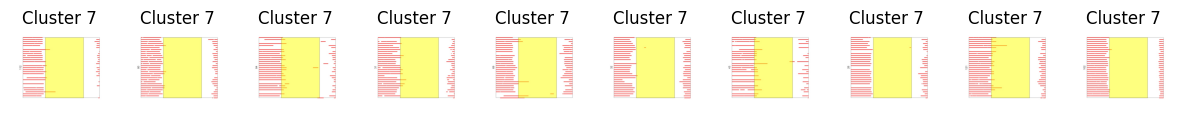

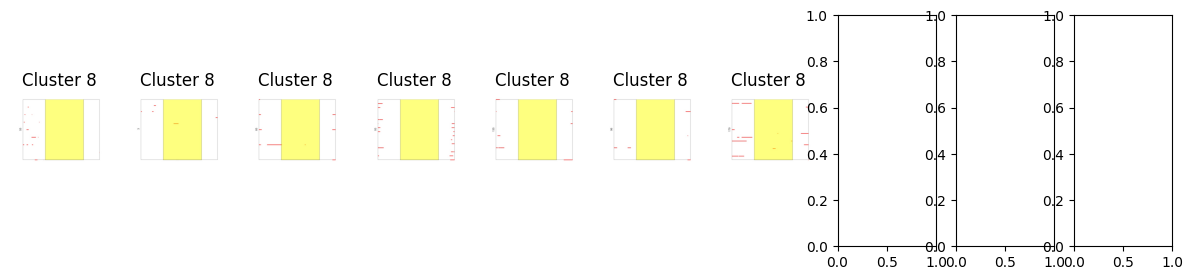

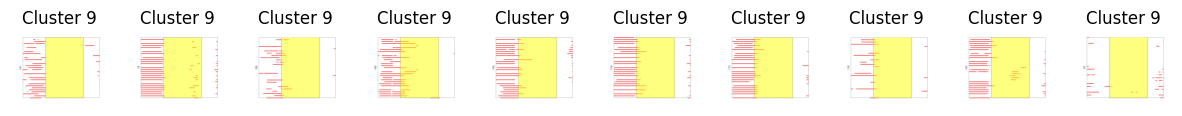

In [ ]:
import matplotlib.pyplot as plt
for i in range(n_clusters):
    show_images_from_cluster(i)